### We fit a 2-layer net using PyTorch Tensors
Now pytorch: no need the Variable wrapper

In [1]:
# -*- coding: utf-8 -*-
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtype = torch.float
device = torch.device("cpu")
# dtype = torch.device("cuda:0") # Uncomment this to run on GPU

In [3]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

In [4]:
# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype) # input
y = torch.randn(N, D_out, device=device, dtype=dtype) # target

In [5]:
# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)


In [6]:
# Collect errors to evaluate performance
errorlist = [];

In [7]:
learning_rate = 1e-6
for t in range(100):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the a scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    
    errorlist = np.append(errorlist,loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad(): 
        
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 26801694.0
1 22013472.0
2 21431112.0
3 22217142.0
4 22111434.0
5 19887184.0
6 15543956.0
7 10689017.0
8 6669328.5
9 4010181.5
10 2444278.5
11 1575021.625
12 1091524.25
13 812627.5625
14 640753.875
15 526469.5
16 444470.90625
17 381934.125
18 332003.1875
19 290920.1875
20 256342.515625
21 226860.84375
22 201486.984375
23 179532.71875
24 160448.78125
25 143756.09375
26 129079.0703125
27 116149.1875
28 104728.8046875
29 94595.65625
30 85585.921875
31 77551.1015625
32 70378.9453125
33 63972.65625
34 58224.7734375
35 53058.75
36 48407.8984375
37 44218.3203125
38 40434.8515625
39 37013.69921875
40 33912.640625
41 31101.6484375
42 28549.474609375
43 26229.00390625
44 24116.24609375
45 22191.80078125
46 20435.626953125
47 18831.103515625
48 17364.458984375
49 16022.1572265625
50 14793.48046875
51 13666.8046875
52 12634.171875
53 11686.693359375
54 10815.73046875
55 10015.2021484375
56 9278.4423828125
57 8600.80859375
58 7976.6015625
59 7401.5126953125
60 6871.28076171875
61 6381.74755859375


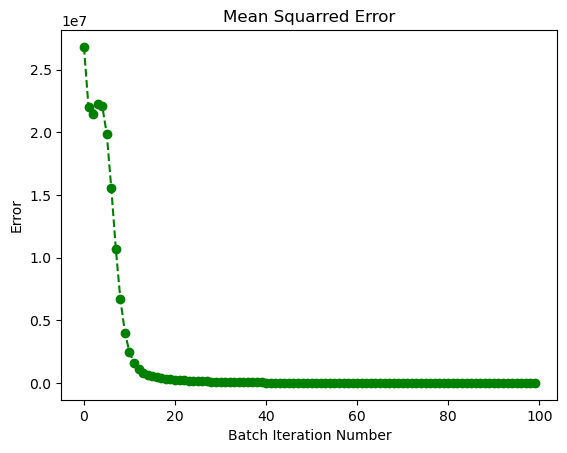

In [8]:
plt.plot(errorlist,'--og');
plt.title("Mean Squarred Error")
plt.xlabel("Batch Iteration Number")
plt.ylabel("Error")
plt.show()

In [9]:
print (type(loss))

<class 'torch.Tensor'>
